In [ ]:
from ortools.sat.python import cp_model
import random
import networkx as nx
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp
import random
import numpy as np

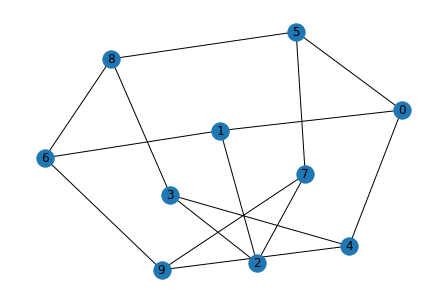

In [ ]:
G = nx.Graph()
G = nx.petersen_graph()
# G.add_nodes_from([0,1,2,3])
# G.add_edges_from([(0,1),(0,2),(1,3),(2,3),(1,2)])
nx.draw(G, with_labels=True)


# Modelo
\begin{align*}
x,y,z & \in & \{0,1,2\}\\
x &\neq& y\\
\end{align*}  

In [ ]:
model = cp_model.CpModel()

x = model.NewIntVar(0, 2, 'x')
y = model.NewIntVar(0, 2, 'y')
z = model.NewIntVar(0, 2, 'z')

model.Add( x != y )

solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  print('x = %i' % solver.Value(x))
  print('y = %i' % solver.Value(y))
  print('z = %i' % solver.Value(z))



x = 1
y = 0
z = 0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


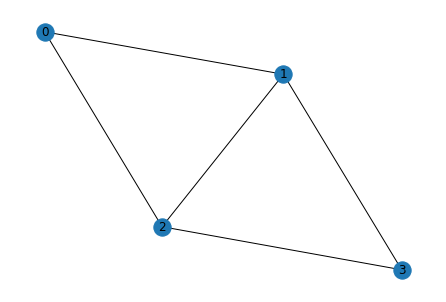

In [ ]:
G = nx.Graph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([(0,1),(0,2),(1,3),(2,3),(1,2)])
nx.draw(G, with_labels=True)


# Modelo

Seja $G = (V,E)$, onde $|V| = n$

$
\begin{align*}
color[v] & \quad \in & \{1, \ldots, n\} & \quad \forall v \in V\\
color[v] & \quad \neq      & color[u]   & \quad \forall u,v \in E\\ 
\end{align*}
$

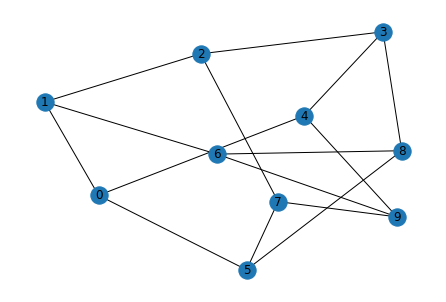

In [ ]:
G = nx.petersen_graph()
nx.draw(G, with_labels=True)

In [ ]:
model = cp_model.CpModel()

color = []

n = len(G.nodes)

for x in G.nodes:
  name = "x%i" % x
  color.append( model.NewIntVar(1, n, name) )

for (x,y) in G.edges:
  #print ("(%i,%i)" % (x,y) )
  model.Add(color[x-1] != color[y-1] )


solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  for x in G.nodes:
    print("color[%i] = %i" % (x, solver.Value(color[x])) )  

color[0] = 5
color[1] = 4
color[2] = 3
color[3] = 2
color[4] = 3
color[5] = 2
color[6] = 2
color[7] = 1
color[8] = 1
color[9] = 6


# Modelo

Seja $G = (V,E)$, onde $|V| = n$

$
\begin{align*}
min & &  z\\
color[v] & \quad \in & \{1, \ldots, n\} & \quad \forall v \in V\\
color[v] & \quad \neq      & color[u]   & \quad \forall u,v \in E\\ 
z        & \quad =         & max(\{ color[v] ~|~ \forall v \in V\} )\\    
\end{align*}
$



In [ ]:
model = cp_model.CpModel()

color = []

n = len(G.nodes)

for x in G.nodes:
  name = "x%i" % x
  color.append( model.NewIntVar(1, n, name) )

for (x,y) in G.edges:
  #print ("(%i,%i)" % (x,y) )
  model.Add(color[x-1] != color[y-1] )

model.AddMaxEquality(z, color) 

model.Minimize(z)


solver = cp_model.CpSolver()
status = solver.Solve(model)

if status == cp_model.OPTIMAL:
  for x in G.nodes:
    print("color[%i] = %i" % (x, solver.Value(color[x])) )

color[0] = 2
color[1] = 1
color[2] = 3
color[3] = 1
color[4] = 1
color[5] = 1
color[6] = 3
color[7] = 2
color[8] = 2
color[9] = 3


# Modelo Coloração Gulosa

\begin{align*}
z   & = & \max ~\{ color[v] : v \in V\}\\
P_v & = & \bigcup_{u \in N(v)} \{color[u]\}\\
color[v] & = & \min ~ \{1,2,\ldots, n\} \setminus P_v\\
z        & \in &  ~ \{1,2,\ldots, n\}\\
color    & \in &  ~ \{1,2,\ldots, n\}\\
P_v      & \in &  ~ \{1,2,\ldots, n\}\\
\pi
\end{align*}

In [ ]:
from ortools.sat.python import cp_model
import networkx as nx
import matplotlib.pyplot as plt

G = nx.petersen_graph()

#nx.draw(G, with_labels=True)


model = cp_model.CpModel()

n = len(G.nodes)

color = {}
for x in range(n):
  for c in range(n):
    name = "x[%d][%d]" % (x,c)
    color[x,c] = model.NewIntVar(0,1,name) 


for x in range(n):
  model.Add( sum( color[x,k] for k in range(n)) == 1)




solver = cp_model.CpSolver()
status = solver.Solve(model)


if status == cp_model.OPTIMAL:
  print("optimal")

  for x in range(n):
    for k in range(n):
      if solver.Value( color[x,k] ) == 1:
        print("vertice %d recebe cor %d" % (x,k) )

optimal
vertice 0 recebe cor 0
vertice 1 recebe cor 0
vertice 2 recebe cor 0
vertice 3 recebe cor 0
vertice 4 recebe cor 0
vertice 5 recebe cor 0
vertice 6 recebe cor 0
vertice 7 recebe cor 0
vertice 8 recebe cor 0
vertice 9 recebe cor 0


# Modelo Coloração Gulosa

\begin{align*}
Z &  &  \\  
\\
s.a & & \\
\\
\sum_{c \in C} x_v^c& =1   &  & \forall v \in V\\
x_v^c - z_c & \leq 0 &  & \forall v \in V,\forall c \in C \\
x_v^c + x_u^c & \leq 1 &  & \forall \{u,v\} \in E,\forall c \in C \\
x_v^c & \in \{0,1\}    &  &  ~ \forall v \in V , \forall c \in C\\
z_c & \in \{0,1\}     &  &  ~ \forall c \in C\\
\end{align*}


In [ ]:
from ortools.linear_solver import pywraplp
import random

solver = pywraplp.Solver.CreateSolver('SCIP')

nodes = list(range(0,len(G.nodes)))
# nodes =[8, 4, 2, 3, 5, 6, 7, 9, 1, 0]
random.shuffle(nodes)
print("nodes ",nodes)

x = {}
for v in nodes:
  for c in G.nodes:
    name = "x[%d,%d]" % (v, c)
    x[v, c] = solver.IntVar(0, 1, name)
    
z = {}
for c in nodes:
  name = "z[%d]" %  c
  z[c] = solver.IntVar(0, 1, name)
 

for v in nodes:
  solver.Add( solver.Sum([ x[v, c] for c in G.nodes]) == 1)

for (u,v) in G.edges:
  for c in G.nodes:
    solver.Add( x[u,c] + x[v,c] <= 1)

for v in nodes:
  for c in G.nodes:
    solver.Add( x[v,c]-z[c]<=0)

# solver.Objective(solver.Sum(z[c] for c in nodes))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    maxcolor=0
    for v in nodes:
      for c in G.nodes:
        if(x[v,c].solution_value()==1):
            maxcolor=c+1
        
    print('Valor da função Objetivo =', maxcolor)    
#     print('Valor da função Objetivo =', solver.Objective().Value())

    for v in nodes:
      for c in G.nodes:
        print("x[%i,%i] = %i" % (v,c, x[v,c].solution_value() ),end=' ')
      print()
else:
    print('Sem solução ótima.')


nodes  [8, 2, 6, 4, 1, 7, 3, 0, 5, 9]
Solução:
Valor da função Objetivo = 3
x[8,0] = 1 x[8,1] = 0 x[8,2] = 0 x[8,3] = 0 x[8,4] = 0 x[8,5] = 0 x[8,6] = 0 x[8,7] = 0 x[8,8] = 0 x[8,9] = 0 
x[2,0] = 1 x[2,1] = 0 x[2,2] = 0 x[2,3] = 0 x[2,4] = 0 x[2,5] = 0 x[2,6] = 0 x[2,7] = 0 x[2,8] = 0 x[2,9] = 0 
x[6,0] = 0 x[6,1] = 1 x[6,2] = 0 x[6,3] = 0 x[6,4] = 0 x[6,5] = 0 x[6,6] = 0 x[6,7] = 0 x[6,8] = 0 x[6,9] = 0 
x[4,0] = 1 x[4,1] = 0 x[4,2] = 0 x[4,3] = 0 x[4,4] = 0 x[4,5] = 0 x[4,6] = 0 x[4,7] = 0 x[4,8] = 0 x[4,9] = 0 
x[1,0] = 0 x[1,1] = 0 x[1,2] = 1 x[1,3] = 0 x[1,4] = 0 x[1,5] = 0 x[1,6] = 0 x[1,7] = 0 x[1,8] = 0 x[1,9] = 0 
x[7,0] = 0 x[7,1] = 1 x[7,2] = 0 x[7,3] = 0 x[7,4] = 0 x[7,5] = 0 x[7,6] = 0 x[7,7] = 0 x[7,8] = 0 x[7,9] = 0 
x[3,0] = 0 x[3,1] = 1 x[3,2] = 0 x[3,3] = 0 x[3,4] = 0 x[3,5] = 0 x[3,6] = 0 x[3,7] = 0 x[3,8] = 0 x[3,9] = 0 
x[0,0] = 0 x[0,1] = 1 x[0,2] = 0 x[0,3] = 0 x[0,4] = 0 x[0,5] = 0 x[0,6] = 0 x[0,7] = 0 x[0,8] = 0 x[0,9] = 0 
x[5,0] = 0 x[5,1] = 0 x[5,2] = 1 x[5

# Modelo Coloração Grundy

\begin{align*}
\max & \sum_{c \in C} z_c &  \\  
\\
s.a & & \\
\\
\sum_{c \in C} z_c^x & =1   &  & \forall v \in V\\
z_c & \leq \sum_{v \in V} x_v^c &  & \forall c \in C\\
x_v^c + x_u^c & \leq z_c &  & \forall \{u,v\} \in E,\forall c \in C \\
x_v^c & \geq 1 - \sum_{d=1}^{c-1}x_v^d -  \sum_{u\in N(v)}x_u^c       &  &  ~ \forall v \in V , \forall c \in C\\
x_v^c & \in \{0,1\}    &  &  ~ \forall v \in V , \forall c \in C\\
z_c & \in \{0,1\}     &  &  ~ \forall c \in C\\
\end{align*}

Referência: http://repositorio.ufc.br/bitstream/riufc/50955/3/2020_dis_enhdrodrigues.pdf

In [ ]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('SCIP')

x = {}
for v in G.nodes:
  for c in G.nodes:
    name = "x[%d,%d]" % (v, c)
    x[v, c] = solver.IntVar(0, 1, name)

z = {}
for c in G.nodes:
  name = "z[%d]" %  c
  z[c] = solver.IntVar(0, 1, name)
 

for v in G.nodes:
  solver.Add( solver.Sum([ x[v, c] for c in G.nodes]) == 1)

for c in G.nodes:
  solver.Add( z[c] <= solver.Sum([ x[v,c] for v in G.nodes]))


for (u,v) in G.edges:
  for c in G.nodes:
    solver.Add( x[u,c] + x[v,c] <= z[c])

for v in G.nodes:
  for c in G.nodes:
    solver.Add(x[v,c] >= 1 - solver.Sum( x[v,d] for d in range(0,c) ) - solver.Sum(x[u,c] for u in G.adj[v]))

solver.Maximize(solver.Sum(z[c] for c in G.nodes))

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solução:')
    print('Valor da função Objetivo =', solver.Objective().Value())
    for v in G.nodes:
      for c in G.nodes:
        print("x[%i,%i] = %i" % (v,c, x[v,c].solution_value() ),end=' ')
      print()
else:
    print('Sem solução ótima.')




Solução:
Valor da função Objetivo = 4.0
x[0,0] = 0 x[0,1] = 1 x[0,2] = 0 x[0,3] = 0 x[0,4] = 0 x[0,5] = 0 x[0,6] = 0 x[0,7] = 0 x[0,8] = 0 x[0,9] = 0 
x[1,0] = 1 x[1,1] = 0 x[1,2] = 0 x[1,3] = 0 x[1,4] = 0 x[1,5] = 0 x[1,6] = 0 x[1,7] = 0 x[1,8] = 0 x[1,9] = 0 
x[2,0] = 0 x[2,1] = 1 x[2,2] = 0 x[2,3] = 0 x[2,4] = 0 x[2,5] = 0 x[2,6] = 0 x[2,7] = 0 x[2,8] = 0 x[2,9] = 0 
x[3,0] = 0 x[3,1] = 0 x[3,2] = 1 x[3,3] = 0 x[3,4] = 0 x[3,5] = 0 x[3,6] = 0 x[3,7] = 0 x[3,8] = 0 x[3,9] = 0 
x[4,0] = 1 x[4,1] = 0 x[4,2] = 0 x[4,3] = 0 x[4,4] = 0 x[4,5] = 0 x[4,6] = 0 x[4,7] = 0 x[4,8] = 0 x[4,9] = 0 
x[5,0] = 1 x[5,1] = 0 x[5,2] = 0 x[5,3] = 0 x[5,4] = 0 x[5,5] = 0 x[5,6] = 0 x[5,7] = 0 x[5,8] = 0 x[5,9] = 0 
x[6,0] = 0 x[6,1] = 1 x[6,2] = 0 x[6,3] = 0 x[6,4] = 0 x[6,5] = 0 x[6,6] = 0 x[6,7] = 0 x[6,8] = 0 x[6,9] = 0 
x[7,0] = 0 x[7,1] = 0 x[7,2] = 1 x[7,3] = 0 x[7,4] = 0 x[7,5] = 0 x[7,6] = 0 x[7,7] = 0 x[7,8] = 0 x[7,9] = 0 
x[8,0] = 0 x[8,1] = 0 x[8,2] = 0 x[8,3] = 1 x[8,4] = 0 x[8,5] = 0 x[8,6]

In [ ]:
def model_grundy(grafo,upperbound):
    solver = pywraplp.Solver.CreateSolver('SCIP')
    x = {}
    for v in grafo.nodes:
        for c in range(upperbound):
            name = "x[%d,%d]" % (v, c)
            x[v, c] = solver.IntVar(0, 1, name)

    z = {}
    for c in range(upperbound):
        name = "z[%d]" % c
        z[c] = solver.IntVar(0, 1, name)

    for v in grafo.nodes:
        solver.Add(solver.Sum([x[v, c] for c in range(upperbound)]) == 1)

    for c in range(upperbound):
        solver.Add(z[c] <= solver.Sum([x[v, c] for v in grafo.nodes]))

    for (u, v) in grafo.edges:
        for c in range(upperbound):
            solver.Add(x[u, c] + x[v, c] <= z[c])

    for v in grafo.nodes:
        for c in range(upperbound):
            solver.Add(x[v, c] >= 1 - solver.Sum(x[v, d] for d in range(0, c)) - solver.Sum(x[u, c] for u in grafo.adj[v]))

    solver.Maximize(solver.Sum(z[c] for c in range(upperbound)))

    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print('Solução:')
        print('Valor da função Objetivo =', solver.Objective().Value())
        # for v in grafo.nodes:
        #     for c in range(upperbound):
        #         print("%.2f" %(x[v, c].solution_value()), end=' ')
        #     print()
    else:
        print('Sem solução ótima.')


# Implementação Coloração gulosa

In [ ]:
def corMinima(G, index, coloracao):
    vizinhos = set([])
    for y in G.adj[index]:
        if(coloracao[y] != -1):
            vizinhos.add(coloracao[y])
    c = set(range(1, len(G.nodes)+1))
#     print(c.difference(vizinhos))
    return min(c.difference(vizinhos))

def coloracaoGulosa(G, ordervertex):
    c = []
    for x in G.nodes:
        c.append(-1)
    for index in ordervertex:
        c[index] = corMinima(G, index, c)
    print("vertex color", c)
    return max(c)


In [ ]:
nodes = list(range(0,len(G.nodes)))
random.shuffle(nodes)
print("nodes ",nodes)
print("maxcolor",coloracaoGulosa(G,nodes))

nodes  [2, 3, 0, 1, 9, 5, 7, 4, 8, 6]
vertex color [1, 2, 1, 2, 3, 2, 3, 3, 1, 1]
maxcolor 3


# Coloração de Grundy - Ordenação dos vertices em ordem crescente pelo grau

In [ ]:
def ordemVerticesGrauCrescente(G):
    grau = []
    for i in G.nodes:
        grau.append((i, len(G.adj[i])))
    grau.sort(key=lambda x: x[1], reverse=True)
    return grau


def isConflict(G, index, adjacent, c):
    if(c[index] == c[adjacent]):
        return True
    for y in G.adj[adjacent]:
        if(c[adjacent] == c[y] and y != index):
            return True
    return False


def corMinima(G, index, coloracao):
    vizinhos = set([])
    for y in G.adj[index]:
        if(coloracao[y] != -1):
            vizinhos.add(coloracao[y])
    c = set(range(1, len(G.nodes)+1))
#     print(c.difference(vizinhos))
    return min(c.difference(vizinhos))

def sgNumberGrundy(G):
    c = []
    for x in G.nodes:
        c.append(-1)
    aux = ordemVerticesGrauCrescente(G)
    for index, _ in aux:
        aux = 1
        for y in G.adj[index]:
            if(c[index] > 1):
                aux = max(aux, c[index])

        c[index] = aux+1

        for y in G.adj[index]:
            c[y] = corMinima(G, y, c)
    print(c)
    return max(c)


In [ ]:
sgNumberGrundy(G)

[1, 3, 1, 3, 4, 3, 1, 4, 2, 2]


4

# Upper Bound - Stair factor

In [ ]:
def calcGrau(G):
    grau = {}
    for i in G.nodes:
        grau[i] = len(G.adj[i])
    return grau


def ordemCrescenteGrau(G):
    grauMax = 0
    bin = {}
    pos = {}
    vert = {}

    graus = calcGrau(G)

    for v in G.nodes:
        grauMax = max(grauMax, graus[v])

    for d in range(grauMax+1):
        bin[d] = 0

    for v in G.nodes:
        bin[graus[v]] += 1

    start = 1
    for d in range(grauMax+1):
        num = bin[d]
        bin[d] = start
        start += num

    for v in G.nodes:
        pos[v] = bin[graus[v]]
        vert[pos[v]] = v
        bin[graus[v]] += 1

    for d in range(grauMax, 0, -1):
        bin[d] = bin[d-1]
    bin[0] = 1

    # print('bin ',bin,'\n')
    # print('\nvert ',vert,'\n')
    # print('pos',pos,'\n')
    # print('graus',graus,'\n')

    return bin, vert, pos, graus

def vertex_decomposition(G):
    G = G.copy()
    ordem = []
    graus_ordem = {}

    bin, vert, pos, graus = ordemCrescenteGrau(G)

    for i in range(len(G.nodes), 0, -1):
        v = vert[i]
        for u in G.adj[v]:
            # if graus[u] > graus[v]:
            du = graus[u]
            pu = pos[u]
            pw = bin[du]
            w = vert[pw]
            if u == w:
                pos[u] = pw
                vert[pu] = w
                pos[w] = pu
                vert[pw] = u
            bin[du] += 1
            graus[u] -= 1
        # G.remove_node(v)

        graus_ordem[v] = graus[v]
        ordem.append(v)

    # print('Ordem de decomposicao', ordem, '\n')
    # print('Graus dos vertices da ordem', graus_ordem, '\n')

    return ordem, graus_ordem


def stairfactor(G):
    # graus = calcGrau(G)
    ordem, graus_ordem = vertex_decomposition(G)

    stairfactor = np.inf
    for ind, vertex in zip(range(1,len(ordem)+1), ordem):
        stairfactor = min(stairfactor, graus_ordem[vertex]+ind)
    return stairfactor



# Algorithm BronKerbosch - findCliques

In [ ]:
def findCliques(G,P, R=None, X=None,cliques=[]):
    P = set(P)
    R = set() if R is None else R
    X = set() if X is None else X
    if not P and not X:
        cliques.append(R)
        # yield R
    try:
        u = random.choice(list(P.union(X)))
        S = P.difference(G.adj[u])
    # if union of P and X is empty
    except IndexError:
        S = P
    for v in S:
        findCliques(G=G,P=P.intersection(G.adj[v]), R=R.union([v]), X=X.intersection(G.adj[v]),cliques=cliques)
        P.remove(v)
        X.add(v)

def findCliques3(G):
    P = set(list(G.nodes()))
    R = set() 
    X = set() 
    cliques = []
    ordem , graus = vertex_decomposition(G)
    # print(ordem)
    for v in reversed(ordem):
        findCliques(G=G,P=P.intersection(G.adj[v]), R={v}, X=X.intersection(G.adj[v]),cliques=cliques)
        P.remove(v)
        X.add(v)
    return cliques

# ck=[]
# findCliques(G=Z,P=dict(Z.nodes()),cliques=ck)
# print(ck)
# print("\n")
# print()
# print(findCliques3(Z))

# Lawler - dynamic programming algorithm

In [ ]:
def powerset(s):
    power_set=[[]]
    for elem in s:
        for sub_set in power_set:
            power_set=power_set+[list(sub_set)+[elem]]
    return power_set

    
def lawler(G):
    global po
    po=0
    n = len(G.nodes())
    x = dict()
    lastname=''
    subsets = list(powerset(G.nodes()))
    for a in subsets:
        name = ' '.join([str(elem) for elem in a])
        x[name] = 0
        lastname=name
    
    for a in subsets:
        name = ' '.join([str(elem) for elem in a])
        x[name] = 0
        
        COMP = nx.complement(G.subgraph(a))
        # for i in list(nx.find_cliques(COMP)):
        for i in findCliques3(G=COMP):
            # print("i ",i)
            if(list(i) != []):
                # print("teste - ",list(i))
                s_i = list(set(a) - set(i))
                if(s_i==[] or s_i==None):
                    #  print("S_I Vazio ,",s_i)
                    x[name] = max(x[name],x[""] + 1)
                else:
                    # print("Aqui ,",sorted(s_i))
                    name_s_i = ' '.join([str(elem) for elem in sorted(s_i)])
                    # print(name_s_i)
                    x[name] = max(x[name],x[name_s_i] + 1)
                    po = max(x[name],po)
                    # print(po)
    # print(x[lastname])
    return x[lastname]

        

# Branch-and-Bound - Number Grundy

In [ ]:

class Bound:
    def __init__(self):
        self.ub = 0
        self.lb = 0
        self.maxCor=0
        self.coloracao = []
    
    def __str__(self) -> str:
        return 'UB={self.ub}, LB={self.lb} maxCor={self.maxCor}'.format(self=self)

def coloracaoInicial(G):
    c = []
    for x in G.nodes:
        c.append(-1)
    return c

def TodosVerticeColoridos(c):
    if(-1 in c):
        return False
    return True

def coresDisponiveis(G,v,color,ub):
    vizinhos = set([])
    for y in G.adj[v]:
        if(color[y]!=-1):
            vizinhos.add(color[y])
    c = list(range(1,ub+1))
    if(vizinhos==set([])):
        return c
    for x in vizinhos:
        if x in c:
            c.remove(x)
    
    # print("ub ",ub," c",c," vizinhos ",vizinhos," coloracao ",color)
    return c

def BAB(Grafo,limiteSuperior):
    bound = Bound()
    bound.lb = 0
    bound.ub = limiteSuperior
    # b.ub = corMaxima(G)+1
    bound.coloracao = coloracaoInicial(Grafo)
    bound.maxCor =0
    # V = list(G.nodes)
    
    V,graus = vertex_decomposition(Grafo)
    # V = list(reversed(V))
    print("Ordem -> ",V)
    print("Graus -> ",calcGrau(Grafo))
    BABNumberGrundy(Grafo, V, bound, graus,bound.coloracao.copy())
    return bound.maxCor

def isGrundyColoring(Grafo,coloracao):
    for no in Grafo.nodes():
        cor = coloracao[no]
        coresUsadas = set({})
        for x in Grafo.adj[no]:
            if coloracao[x] not in coresUsadas and coloracao[x]<cor:
                coresUsadas.add(coloracao[x])
        # print("No ",no," Cor ",cor," Cores usadas",coresUsadas, " ADJ ",Grafo.adj[no])
        if(cor!=len(coresUsadas)+1):
            # print("Saida - ",cor," ",coresUsadas)
            return False
    return True


def BABNumberGrundy(Grafo, V, b, graus,coloracao):
    if(TodosVerticeColoridos(coloracao) == True):
        if isGrundyColoring(Grafo,coloracao):
            
            if max(coloracao) > b.lb:
                b.lb = max(b.lb,max(coloracao))
                b.maxCor = max(b.lb,b.maxCor)
                b.coloracao = coloracao
    else:
        # index = random.randint(0, len(V)-1)
        index = 0
        valores = coresDisponiveis(Grafo, V[index], coloracao.copy(), min(len(Grafo.adj[V[index]])+1,b.ub))
        for cor in list(reversed(valores)):
            nova_coloracao = coloracao.copy()
            nova_coloracao[V[index]] = cor
            corMaxima = max(nova_coloracao)
               
            if(corMaxima >= b.lb):
                new_V = V.copy()
                new_V.remove(new_V[index])
                
                BABNumberGrundy(Grafo, new_V, b,graus,nova_coloracao.copy())
            # else:
            #     print(corMaxima," ",b.lb)
                # BABNumberGrundy(G, V, b,graus,coloracao)


# Gerador de grafos aleatorios(n,p)

In [ ]:
def generateGraph(n,p):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        for j in range(i,n):
            if(i!=j):
                if(random.uniform(0, 1) <= p ):
                    G.add_edge(i,j)
    return G
                

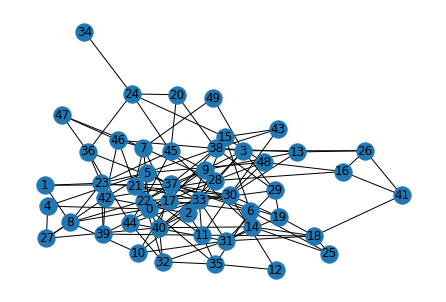

In [ ]:
G = generateGraph(50,0.1)
G.edges()
nx.draw(G, with_labels=True)

# Gerador de produto lexicografico de grafos - Stacked Book


In [ ]:
def generateStackedBookGraph(n,m):
    G1 = nx.Graph()
    H1 = nx.Graph()
    H1 = nx.star_graph(m)
    G1 = nx.path_graph(n)
    P1 = nx.cartesian_product(H1, G1)
    # nx.draw(P, with_labels=True)
    lista = sorted(P1)
    mapping ={}
    for no, novo in zip(lista,range(len(lista))):
        mapping[no] = novo
    A = nx.relabel_nodes(P1, mapping)
    return A

# Teste Computacionais

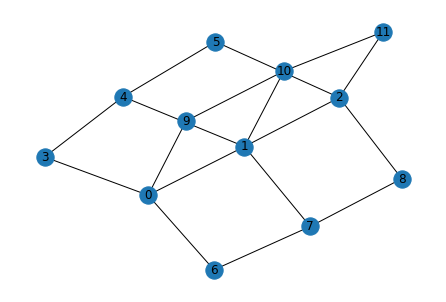

In [ ]:
Z = generateStackedBookGraph(3,3)
nx.draw(Z, with_labels=True)

In [ ]:
print(BAB(Z,stairfactor(Z)))

Ordem ->  [1, 2, 0, 10, 7, 4, 11, 9, 8, 6, 5, 3]
Graus ->  {0: 4, 1: 5, 2: 4, 3: 2, 4: 3, 5: 2, 6: 2, 7: 3, 8: 2, 9: 2, 10: 3, 11: 2}
4
